## Movie Sentiment Analysis

### Background

Sentiment Analysis is a technique used in natural language processing to identify and extract sentiments or opinions expressed in text data. The primary objective is to comprehend the sentiment enclosed in text whether positive, negative or neutral. One approach to classify sentiments is to use supervised learning algorithms and deep learning neural networks.

Movie reviews are often used to gauge the performance of a movie, and are often a source of insight for movie studios and potential viewers to understand the movie’s strong or weak points. Applying sentiment analysis on movies reviews can help better understand viewer’s attitude towards the film.

### Data Exploration

In [2]:
import pandas as pd
from bs4 import BeautifulSoup, MarkupResemblesLocatorWarning
import warnings
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download("averaged_perceptron_tagger", quiet=True)
nltk.download("wordnet", quiet=True)
nltk.download("punkt", quiet=True)
nltk.download("punkt_tab", quiet=True)
nltk.download("stopwords", quiet=True)
nltk.download("averaged_perceptron_tagger_eng", quiet=True)
warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)

In [4]:
reviews = pd.read_csv("IMDB Dataset.csv")
reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
reviews.nunique()

,0
review,49582
sentiment,2


Previewing our data, we can see that a majority of the 50,000 reviews are unique, which makes sense as each review are unique strings of long text. Our reviews are split into 2 categories: positive or negative.

In [ ]:
reviews.isna().sum()

,0
review,0
sentiment,0


### Text Cleaning

In [ ]:
reviews["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

Some issues we can see from the text are:
- Casing inconsistency
- Punctuation
- HTML Tags

These will need to be removed to help feed our later models better data.

#### Applying Lowercase

In [ ]:
reviews["review"] = reviews["review"].apply(lambda x: x.lower() if isinstance(x, str) else x)
reviews["review"][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fa

#### Removing HTML Tags

In [ ]:
reviews["review"] = reviews["review"].apply(lambda x: BeautifulSoup(str(x), "html.parser").get_text())
reviews["review"][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

#### Punctuation and Non-Words

In [ ]:
reviews["review"] = reviews["review"].replace(to_replace=r"[^\w\s]", value="", regex=True)
reviews["review"][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictur

#### Removing Digits

In [ ]:
reviews["review"] = reviews["review"].replace(to_replace=r"\d", value="", regex=True)
reviews["review"][0]

'one of the other reviewers has mentioned that after watching just  oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty picture

#### Tokenization

In [ ]:
reviews["review"] = reviews["review"].apply(word_tokenize)

#### Stop Word Removal

There are some words in our corpus that are very common and have little to no value when evaluating sentiment. Words such as "and", "is", "the", etc., only add bloat to our model and thus, will be removed.

In [ ]:
stop_words = set(stopwords.words("english"))
reviews["review"] = reviews["review"].apply(lambda x: [word for word in x if word not in stop_words])

#### Lemmatization

Lemmatization is a powerful concept because it reduces words to their base form. Words such as "running", "runs" and "ran", will be four different features, however, if we reduce them to their base form "run", we can decrease the size of our vocabulary and allows for better pattern recognition between words.

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {
            "J": wordnet.ADJ,
            "N": wordnet.NOUN,
            "V": wordnet.VERB,
            "R": wordnet.ADV
        }
        return tag_dict.get(tag, wordnet.NOUN)
    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    return lemmas
reviews["review"] = reviews["review"].apply(lemmatize_tokens)

### Exploratory Data Analysis

In [ ]:
print(pd.DataFrame(results))

           Logistic  Decision Tree  Gradient Boosted  Random Forest  Bagging  \
Precision     0.683          0.630             0.709          0.701    0.682   
Accuracy      0.820          0.791             0.808          0.815    0.803   
Recall        0.595          0.512             0.464          0.528    0.483   
ROC AUC       0.748          0.702             0.698          0.724    0.701   

             SVM  Neural Network  
Precision  0.688           0.644  
Accuracy   0.820           0.803  
Recall     0.590           0.571  
ROC AUC    0.747           0.729  


<ipython-input-18-e4eaef7c9696>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Sentiment")


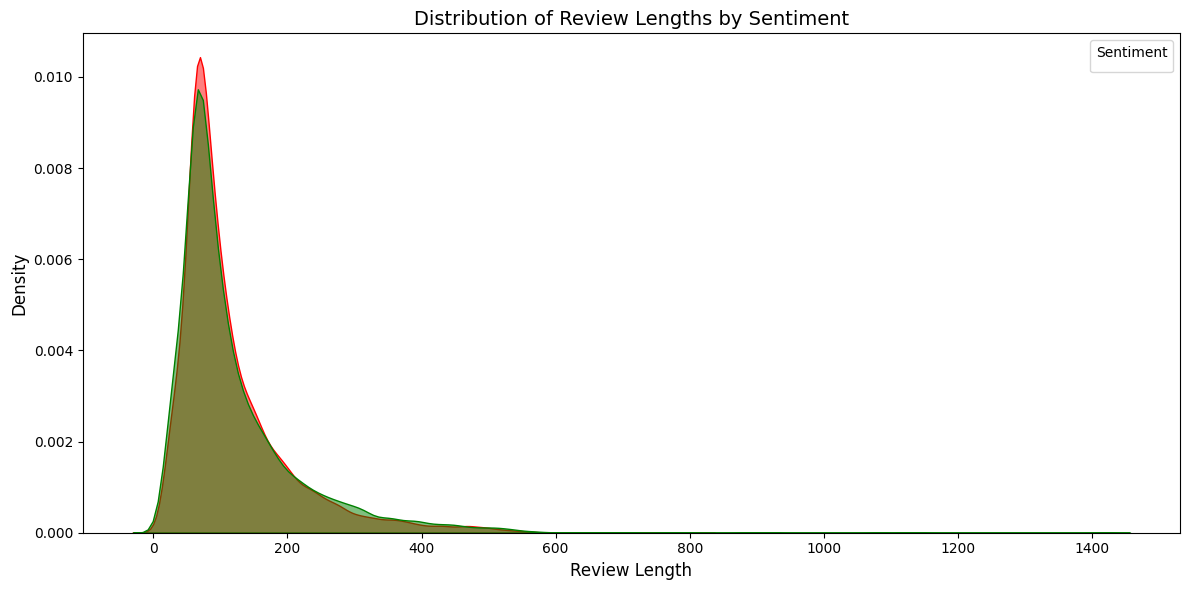

In [ ]:
reviews["review_length"] = reviews["review"].apply(lambda x: len(x))

plt.figure(figsize=(12, 6))
sns.kdeplot(
    data=reviews,
    x="review_length",
    hue="sentiment",
    fill=True,
    common_norm=False,
    alpha=0.5,
    palette={"positive": "green", "negative": "red"}
)

plt.xlabel("Review Length", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distribution of Review Lengths by Sentiment", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

Both the negative and positive reviews, on average, have similar lengths. The average review length after text cleaning is around 100 words, with some reviews on the higher and lower ends.

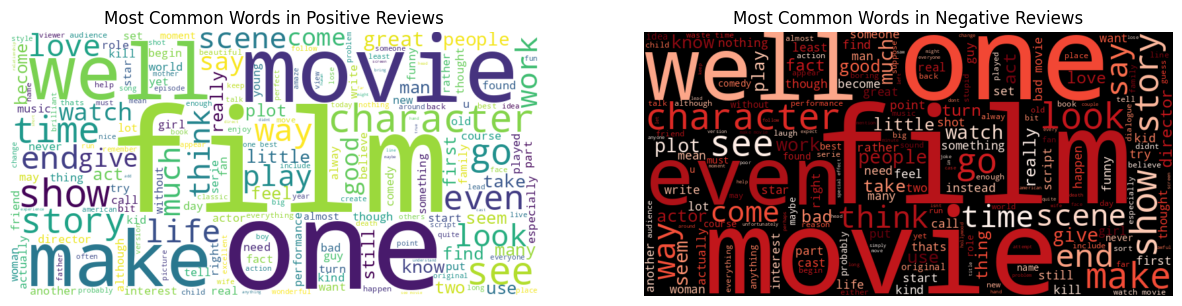

In [ ]:
from wordcloud import WordCloud

positive_reviews = reviews[reviews["sentiment"] == "positive"]["review"].explode().tolist()
negative_reviews = reviews[reviews["sentiment"] == "negative"]["review"].explode().tolist()

pos_text = " ".join(positive_reviews)
neg_text = " ".join(negative_reviews)

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(neg_text)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title("Most Common Words in Positive Reviews")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title("Most Common Words in Negative Reviews")
plt.axis('off')
plt.show()

There are a lot of common word overlap between the positive and negative reviews, words such as "well", "film", "character" and "show" appear often in both. We can notice that words with negative and positive sentiment appearing in their respective visualizations, i.e. "bad" appearing in the negative data and "love" appearing in the positive data.

### Embeddings

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, roc_auc_score, accuracy_score, precision_score, make_scorer

In [6]:
X = reviews["review"].apply(lambda x: " ".join(x))
y = reviews["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

#### Bag of Words

In [ ]:
folds = KFold(n_splits=5, shuffle=True, random_state=42)
bow_settings = {
	"Bag of Words - 20K Words": {'max_features': 20000, 'ngram_range': (1, 1)},
    "Bag of Words - 50K Words Update": {'max_features': 50000, 'ngram_range': (1, 1)},
    "Bag of Words - Bigram Update": {'max_features': 50000, 'ngram_range': (2, 2)},
    "Bag of Words - Mixed Unigram and Bigram Update": {'max_features': 50000, 'ngram_range': (1, 2)},
}

models = {
	"Naive Bayes": (MultinomialNB(), {
		"alpha": [0.1, 0.01, 1]
	}),
	"Logistic Regression": (LogisticRegression(), {
		"C": [0.01, 0.1, 1],
		"penalty": ["l2"],
        "solver": ["liblinear"]
	}),
	"SGD Classifier": (SGDClassifier(), {
		"loss": ["log_loss", "hinge"],
		"penalty": ["l2", "l1"],
		"alpha": [1e-4, 1e-3, 1e-2],
	}),
	"Linear SVC": (LinearSVC(dual=False, max_iter=5000), {
		"C": [0.01, 0.1, 1],
        "loss": ["squared_hinge"],
        "penalty": ["l2"]
	}),
	"XGBoosted Trees": (XGBClassifier(), {
        "learning_rate": [0.1, 0.3]
	})
}

results = []
for desc, vec_params in bow_settings.items():
    print(f"Processing {desc}...")
    vectorizer = CountVectorizer(**vec_params)
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    for model_name, details in models.items():
        print(f"    Tuning {model_name}...")
        classifier, grid_params = details
        grid = GridSearchCV(
          estimator=classifier,
          param_grid=grid_params,
          cv=folds,
          scoring="accuracy",
          n_jobs=-1
        )
        grid.fit(X_train_vec, y_train)
        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test_vec)
        accuracy = accuracy_score(y_test, y_pred)

        results.append({
            "Model": model_name,
            "Vectorizer": desc,
            "CV Accuracy": round(grid.best_score_, 3),
            "Test Accuracy": round(accuracy, 3),
            "Best Params": grid.best_params_
        })


Processing Bag of Words - 20K Words...
    Tuning Naive Bayes...
    Tuning Logistic Regression...
    Tuning SGD Classifier...
    Tuning Linear SVC...
    Tuning XGBoosted Trees...
Processing Bag of Words - 50K Words Update...
    Tuning Naive Bayes...
    Tuning Logistic Regression...


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


    Tuning SGD Classifier...
    Tuning Linear SVC...
    Tuning XGBoosted Trees...
Processing Bag of Words - Bigram Update...
    Tuning Naive Bayes...
    Tuning Logistic Regression...
    Tuning SGD Classifier...
    Tuning Linear SVC...
    Tuning XGBoosted Trees...
Processing Bag of Words - Mixed Unigram and Bigram Update...
    Tuning Naive Bayes...
    Tuning Logistic Regression...
    Tuning SGD Classifier...
    Tuning Linear SVC...
    Tuning XGBoosted Trees...


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
bow_table = pd.DataFrame(results)
print("\n=== Summary Table ===")
print(bow_table)


=== Summary Table ===
                  Model                                      Vectorizer  \
0           Naive Bayes                        Bag of Words - 20K Words   
1   Logistic Regression                        Bag of Words - 20K Words   
2        SGD Classifier                        Bag of Words - 20K Words   
3            Linear SVC                        Bag of Words - 20K Words   
4       XGBoosted Trees                        Bag of Words - 20K Words   
5           Naive Bayes                 Bag of Words - 50K Words Update   
6   Logistic Regression                 Bag of Words - 50K Words Update   
7        SGD Classifier                 Bag of Words - 50K Words Update   
8            Linear SVC                 Bag of Words - 50K Words Update   
9       XGBoosted Trees                 Bag of Words - 50K Words Update   
10          Naive Bayes                    Bag of Words - Bigram Update   
11  Logistic Regression                    Bag of Words - Bigram Update   
12

#### TF-IDF

In [ ]:
folds = KFold(n_splits=5, shuffle=True, random_state=42)
tfidf_settings = {
  "TF-IDF - 20K Words": {
    "max_features": 20000,
    "ngram_range": (1, 1),
  },
  "TF-IDF - 50K Words Update": {
    "max_features": 100000,
    "ngram_range": (1, 1),
  },
  "TF-IDF - Bigram Update": {
    "max_features": 50000,
    "ngram_range": (2, 2),
    "min_df": 1
  },
  "TF-IDF - Mixed Unigram and Bigram Update": {
    "max_features": 50000,
    "ngram_range": (1, 2),
  }
}

models = {
	"Naive Bayes": (MultinomialNB(), {
		"alpha": [0.1, 0.01, 1]
	}),
	"Logistic Regression": (LogisticRegression(), {
		"C": [0.01, 0.1, 1],
		"penalty": ["l2"],
    "solver": ["liblinear"]
	}),
	"SGD Classifier": (SGDClassifier(), {
		"loss": ["log_loss", "hinge"],
		"penalty": ["l2", "l1"],
		"alpha": [1e-4, 1e-3, 1e-2],
	}),
	"Linear SVC": (LinearSVC(dual=False, max_iter=5000), {
		"C": [0.01, 0.1, 1],
        "loss": ["squared_hinge"],
        "penalty": ["l2"]
	}),
	"XGBoosted Trees": (XGBClassifier(), {
        "learning_rate": [0.1, 0.3]
	})
}

results = []
for desc, vec_params in tfidf_settings.items():
    print(f"Processing {desc}...")
    vectorizer = TfidfVectorizer(**vec_params)
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    for model_name, details in models.items():
        print(f"  Tuning {model_name}...")
        classifier, grid_params = details
        grid = GridSearchCV(
          estimator=classifier,
          param_grid=grid_params,
          cv=folds,
          scoring="accuracy",
          n_jobs=-1
        )
        grid.fit(X_train_vec, y_train)
        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test_vec)
        accuracy = accuracy_score(y_test, y_pred)

        results.append({
            "Model": model_name,
            "Vectorizer": desc,
            "CV Accuracy": round(grid.best_score_, 3),
            "Test Accuracy": round(accuracy, 3),
            "Best Params": grid.best_params_
        })

Processing TF-IDF - 20K Words...
  Tuning Naive Bayes...
  Tuning Logistic Regression...
  Tuning SGD Classifier...
  Tuning Linear SVC...
  Tuning XGBoosted Trees...
Processing TF-IDF - 50K Words Update...
  Tuning Naive Bayes...
  Tuning Logistic Regression...
  Tuning SGD Classifier...
  Tuning Linear SVC...
  Tuning XGBoosted Trees...
Processing TF-IDF - Bigram Update...
  Tuning Naive Bayes...
  Tuning Logistic Regression...
  Tuning SGD Classifier...
  Tuning Linear SVC...
  Tuning XGBoosted Trees...
Processing TF-IDF - Mixed Unigram and Bigram Update...
  Tuning Naive Bayes...
  Tuning Logistic Regression...
  Tuning SGD Classifier...
  Tuning Linear SVC...
  Tuning XGBoosted Trees...


In [ ]:
tfidf_table = pd.DataFrame(results)
print("\n=== Summary Table ===")
print(tfidf_table)


=== Summary Table ===
                  Model                                Vectorizer  \
0           Naive Bayes                        TF-IDF - 20K Words   
1   Logistic Regression                        TF-IDF - 20K Words   
2        SGD Classifier                        TF-IDF - 20K Words   
3            Linear SVC                        TF-IDF - 20K Words   
4       XGBoosted Trees                        TF-IDF - 20K Words   
5           Naive Bayes                 TF-IDF - 50K Words Update   
6   Logistic Regression                 TF-IDF - 50K Words Update   
7        SGD Classifier                 TF-IDF - 50K Words Update   
8            Linear SVC                 TF-IDF - 50K Words Update   
9       XGBoosted Trees                 TF-IDF - 50K Words Update   
10          Naive Bayes                    TF-IDF - Bigram Update   
11  Logistic Regression                    TF-IDF - Bigram Update   
12       SGD Classifier                    TF-IDF - Bigram Update   
13         

#### LSTM

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from collections import Counter
import re

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

##### Preprocessing

In [ ]:
def preprocess(text: str):
    text = text.lower()
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d", "", text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    return [word for word in tokens if word not in stop_words]

reviews = pd.read_csv("IMDB Dataset.csv")
reviews["review"] = reviews["review"].apply(preprocess)
reviews["clean_text"] = reviews["review"].apply(lambda x: " ".join(x))
X = reviews["clean_text"]
y = reviews["sentiment"]

encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Text Vectorization

In [ ]:
all_text = " ".join(X_train.tolist()).split()
word_counts = Counter(all_text)
vocab = {word: i+2 for i, (word, _) in enumerate(word_counts.most_common())}
vocab["<PAD>"] = 0
vocab["<UNK>"] = 1

In [ ]:
def text_to_sequence(text, vocab, max_len=100):
    tokens = text.split()
    seq = [vocab.get(word, vocab["<UNK>"]) for word in tokens]
    if len(seq) < max_len:
        seq += [vocab["<PAD>"]] * (max_len - len(seq))
    else:
        seq = seq[:max_len]
    return seq

max_len = 100
X_train_seq = [text_to_sequence(text, vocab, max_len) for text in X_train]
X_test_seq = [text_to_sequence(text, vocab, max_len) for text in X_test]

In [ ]:
class SentimentDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return torch.tensor(self.sequences[idx]), torch.tensor(self.labels[idx])

train_dataset = SentimentDataset(X_train_seq, y_train)
test_dataset = SentimentDataset(X_test_seq, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [ ]:
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim=100, hidden_dim=128, output_dim=2):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        embedded = self.embedding(x)
        _, (hidden, _) = self.lstm(embedded)
        out = self.fc(hidden[-1])
        return self.softmax(out)

model = LSTMClassifier(vocab_size=len(vocab), output_dim=len(set(y)))
model = model.to(device)
loss_fn = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss:.3f}")

Epoch 1/20, Loss: 851.410
Epoch 2/20, Loss: 838.361
Epoch 3/20, Loss: 636.128
Epoch 4/20, Loss: 414.108
Epoch 5/20, Loss: 304.100
Epoch 6/20, Loss: 205.994
Epoch 7/20, Loss: 121.233
Epoch 8/20, Loss: 68.893
Epoch 9/20, Loss: 41.878
Epoch 10/20, Loss: 29.095
Epoch 11/20, Loss: 21.918
Epoch 12/20, Loss: 16.479
Epoch 13/20, Loss: 12.161
Epoch 14/20, Loss: 10.790
Epoch 15/20, Loss: 11.863
Epoch 16/20, Loss: 4.792
Epoch 17/20, Loss: 3.515
Epoch 18/20, Loss: 6.678
Epoch 19/20, Loss: 6.306
Epoch 20/20, Loss: 4.488


In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {correct / total:.3f}")

Test Accuracy: 0.838


### Conclusion

After observing all our models, the one that performs the best is the TF-IDF Linear SVC model with a test accuracy of 90.2%.